# TRIGOMETRY (Lượng giác)

## History (Lịch sử)

### 1. From the 2nd millennium BC to Middle Ages [1](https://en.wikipedia.org/wiki/History_of_trigonometry)
Tất cả các nền văn hóa lớn nghiên cứu về lượng giác qua nghiên cứu thiên văn học. Ban đầu tập trung vào cung đường tròn. Họ nhận ra tỉ lệ giữa chiều dài cung và bán kính. Các ứng dụng ban đầu bao gồm tính toán quỹ đạo của các vì sao, lập bản đồ (giống như daddy hồi đó từng làm), định vị. Qua ngàn năm, các công thức lượng giác được phát hiện lần lượt được phát hiện.

![2](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/L-Triangulierung.png/440px-L-Triangulierung.png)

### 2. From the enlightment age to modern age

Trong thời kỳ khai sáng, sự phát triển của lượng giác tập trung ở châu âu. Lượng giác trở thành một nhánh của ngành toán học. Với những đóng góp của Newton trong giải tích, Stirling Euler, Taylor, Maclaurin. Dưới đây là một số công thức để thù dọa khôi

${\frac{d(\sin(t))}{dt} = \cos(t)}$

${\frac{d(\cos(t)}{dt} = -\sin(t)}$

${\cos(x) = \sum{\frac{(-1)^{n}x^{2n}}{2n!}} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!}+...}$ for all x

${\sin(x) = \sum{\frac{(-1)^{n}x^{2n + 1}}{{2n + 1}!}}= x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...}$ for all x

${\\ e^{ix} = \cos(x) + i\sin(x)\\ \pi = \sum{\frac{4(-1)^n}{2n+1}}=3.1415926535897932384626433832795028841971693993751058209749445}$

<IPython.core.display.Javascript object>


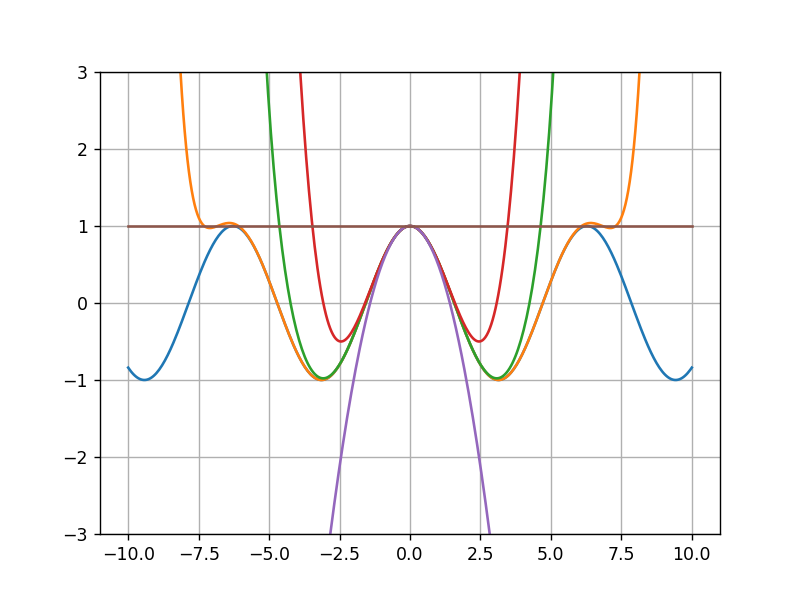

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import MultipleLocator, FuncFormatter,AutoMinorLocator

x = np.linspace(-10,10,num = 400)
def factorial(x:int):
    value = 1
    for i in range(1,x + 1):
        value = value*i
    return value
def taylor_cos_approx(x:np.array,deg:int):
    y = np.zeros(len(x))
    for i in range(0,deg + 1):
        y = y + (((-1)**(i))*x**(2*i))/factorial(2*i)
    return y
fig = plt.figure()
ax = fig.gca()
ax.grid()
ax.plot(x,np.cos(x))
ax.plot(x,taylor_cos_approx(x,8))
ax.plot(x,taylor_cos_approx(x,4))
ax.plot(x,taylor_cos_approx(x,2))
ax.plot(x,taylor_cos_approx(x,1))
ax.plot(x,taylor_cos_approx(x,0))
ax.set_ylim(-3,3);

## Converting between degree and radian

${\sin(\frac{\pi}{2}) = \sin(90^{o}) = 0 \\ \pi = 180^{o}}$

### Why choose radian over degree

Về mặt hình học, thì không có sự khác biệt. Nhưng về mặt giải tích thì có sự khác biệt lớn. Vì $\pi$ là 1 con số không đơn vị tức có nghĩa con số cũng như 1 2 3 tức là ${y = \sin(x)}$ hay ${y = \cos(x)}$ cũng là như là ${y = x}$ hay ${y = x^2}$. Phương trình này có tính chất tuần hoàn. Điều này đồng nghĩa là tiến tới vô cùng (hay nói đơn giản) là nếu 1 con số to đùng thì thì giá trị mà em nhận lại là bao nhiêu 

<IPython.core.display.Javascript object>


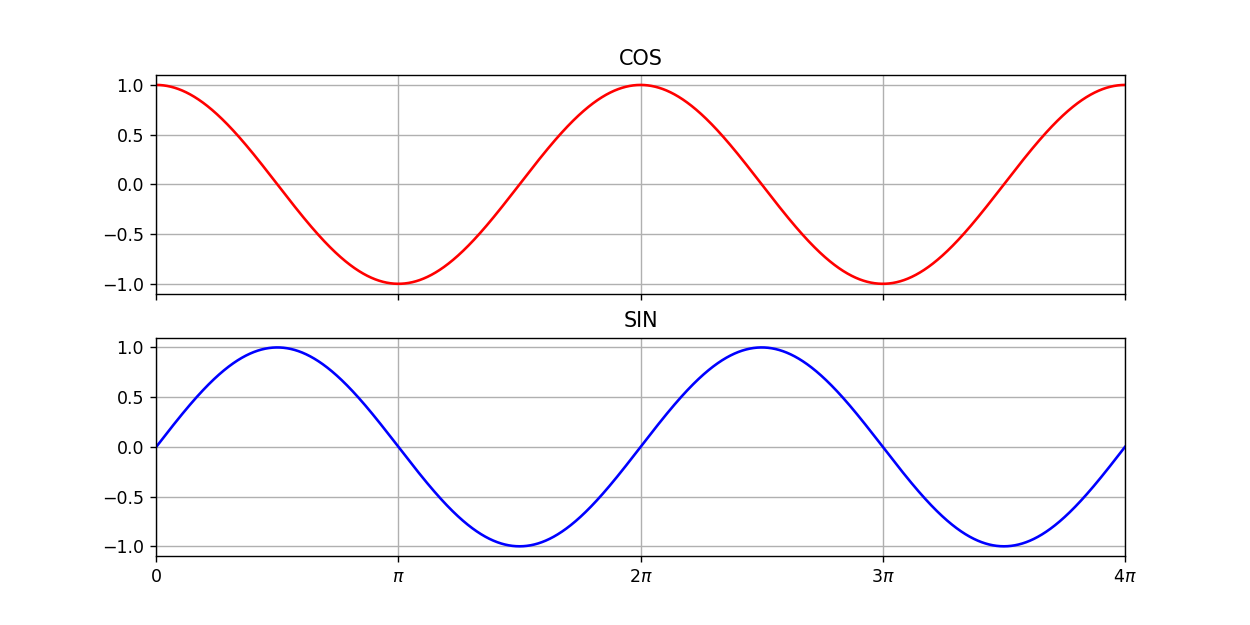

In [2]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
pi = np.pi
x_max = 4*pi
x_min = 0
x_range = np.arange(x_min,x_max,0.001)
cos = np.sin(x_range)
sin = np.cos(x_range)
fig,ax = plt.subplots(2,1,figsize = (10,5),sharex = True)
ax[0].plot(x_range,sin,color = 'r')
ax[1].plot(x_range,cos,color = 'b')
ax[0].set_xlim(x_min,x_max)
ax[1].xaxis.set_major_locator(MultipleLocator(pi))
ax[1].xaxis.set_major_formatter(FuncFormatter(format_func))
ax[0].grid()
ax[1].grid()
ax[0].set_title("COS")
ax[1].set_title("SIN");

<IPython.core.display.Javascript object>


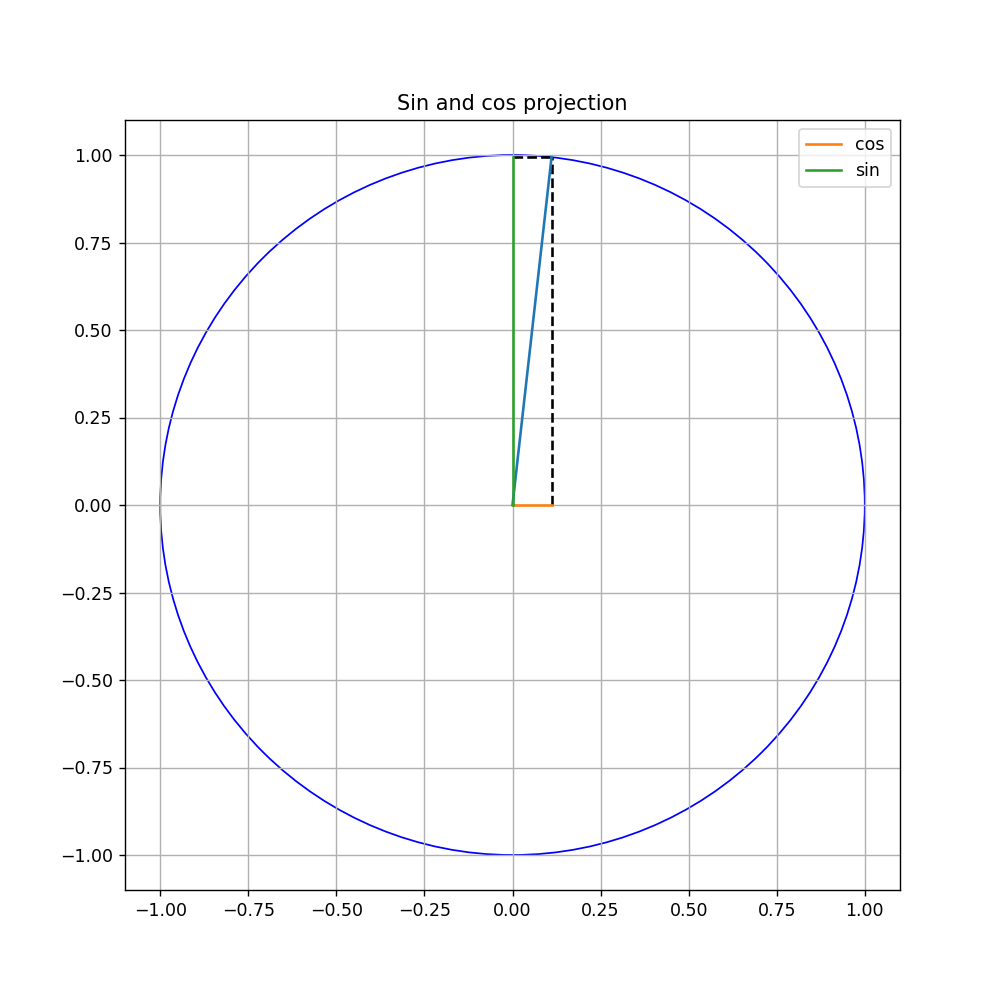

In [3]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
circ = plt.Circle((0,0),radius = 1,edgecolor = 'b',facecolor = "None")
ax.add_patch(circ)
ax.axis('tight')
ax.grid()
y_dash, = ax.plot([0,1],[0,0],"k--")
x_dash, = ax.plot([0,0],[0,0],"k--")
line, = ax.plot([0,1],[0,0])
x, = ax.plot([0,1],[0,0],label = "cos")
y, = ax.plot([0,1],[0,0],label = "sin")
ax.legend(loc = "upper right")
ax.set_title("Sin and cos projection")
def rotate(i):
    line.set_data([0,np.cos(i)],[0,np.sin(i)])
    x.set_data([0,np.cos(i)],[0,0])
    y.set_data([0,0],[0,np.sin(i)])
    y_dash.set_data([0,np.cos(i)],[np.sin(i),np.sin(i)])
    x_dash.set_data([np.cos(i),np.cos(i)],[0,np.sin(i)])
    return [line,x,y,y_dash,x_dash]
animation = FuncAnimation(fig,func = rotate,frames = np.linspace(0,2*pi,100))